In [1]:
%matplotlib inline

seed_value = 100
import os
os.environ['PYTHONHASHSEED']=str(seed_value)
import random
random.seed(seed_value)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objs as go
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from scipy import stats

# Data uploading

In [2]:
#AIRPORT_ICAO = "ESGG"
AIRPORT_ICAO = "ESSA"

DATA_DIR = os.path.join("..", "..")
DATA_DIR = os.path.join(DATA_DIR, "data")
DATA_DIR = os.path.join(DATA_DIR, "Regression")

# AIF
filename = AIRPORT_ICAO + "_metrics_AIF_vertical_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_AIF_vertical_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

filename = AIRPORT_ICAO + "_metrics_AIF_vertical_PIs_by_flight_2019_2020.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_AIF_vertical_PIs_by_flight_df = pd.read_csv(full_filename, sep=' ')

# WIF
filename = AIRPORT_ICAO + "_metrics_WIF_vertical_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_WIF_vertical_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

filename = AIRPORT_ICAO + "_metrics_WIF_vertical_PIs_by_flight_2019_2020.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_WIF_vertical_PIs_by_flight_df = pd.read_csv(full_filename, sep=' ')

# TIF
filename = AIRPORT_ICAO + "_metrics_TIF_vertical_PIs_by_hour.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_TIF_vertical_PIs_by_hour_df = pd.read_csv(full_filename, sep=' ')

filename = AIRPORT_ICAO + "_metrics_TIF_vertical_PIs_by_flight_2019_2020.csv"
full_filename = os.path.join(DATA_DIR, filename)
metrics_TIF_vertical_PIs_by_flight_df = pd.read_csv(full_filename, sep=' ')


# Average Time On Levels

## Medians of Average Time On Levels vs AIF

                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.059
Method:                 Least Squares   F-statistic:                    0.1076
Date:                Tue, 21 Dec 2021   Prob (F-statistic):              0.747
Time:                        18:56:32   Log-Likelihood:                 10.096
No. Observations:                  17   AIC:                            -16.19
Df Residuals:                      15   BIC:                            -14.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7703      0.085      9.084      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


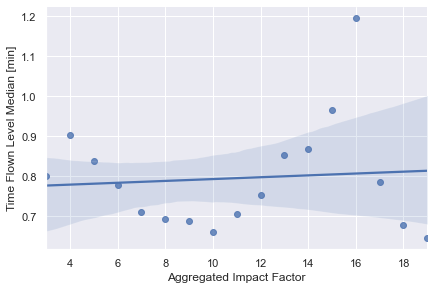

In [3]:
df = metrics_AIF_vertical_PIs_by_hour_df.copy()
df = df[df['timeOnLevelsMean']>0]
# remove time on levels outliers
p1 = df["timeOnLevelsMean"].quantile(0.05)
p2 = df["timeOnLevelsMean"].quantile(0.95)
df = df.loc[(df['timeOnLevelsMean'] > p1) & (df['timeOnLevelsMean'] < p2) ]

df.set_index(['AIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['AIF', 'tiemOnLevelsMedian'])

for idx, group in df.groupby(level='AIF'):
    
    #if len(group)<3: # TODO: find flight ids
    #    continue
    
    idx_df = group['timeOnLevelsMean']
    
    idx_median = np.median(idx_df)
    median_df = median_df.append({'AIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='AIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Aggregated Impact Factor')
plt.ylabel('Time Flown Level Median [min]')


#statsmodel:
X_df = median_df[['AIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary()) # ESGG: 0.89 (0.67), ESSA: 0.57 (0.38)

## Medians of Average Time On Levels vs TIF

                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.450
Method:                 Least Squares   F-statistic:                     9.176
Date:                Tue, 21 Dec 2021   Prob (F-statistic):             0.0143
Time:                        18:56:32   Log-Likelihood:                 15.940
No. Observations:                  11   AIC:                            -27.88
Df Residuals:                       9   BIC:                            -27.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6224      0.035     17.570      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


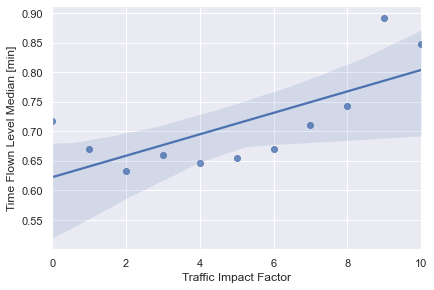

In [4]:
df = metrics_TIF_vertical_PIs_by_hour_df.copy()

df = df[df['timeOnLevelsMean']>0]

# remove time on levels outliers
p1 = df["timeOnLevelsMean"].quantile(0.05)
p2 = df["timeOnLevelsMean"].quantile(0.95)
df = df.loc[(df['timeOnLevelsMean'] > p1) & (df['timeOnLevelsMean'] < p2) ]
#p2 = df["timeOnLevelsMean"].quantile(0.95)
#df = df.loc[df['timeOnLevelsMean'] < p2]


df.set_index(['TIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['TIF', 'timeOnLevelsMedian'])

for idx, group in df.groupby(level='TIF'):
    
    #if len(group)<3:
    #    continue
    
    idx_df = group['timeOnLevelsMean']

    idx_median = np.median(idx_df)
    median_df = median_df.append({'TIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

#print(median_df.tail())

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='TIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Traffic Impact Factor')
plt.ylabel('Time Flown Level Median [min]')


#statsmodel:
X_df = median_df[['TIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary()) # ESGG: 0.23 (0.02), ESSA: 0.37 (0.5)

## Medians of Average Time On Levels vs WIF

                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.5325
Date:                Tue, 21 Dec 2021   Prob (F-statistic):              0.475
Time:                        18:56:33   Log-Likelihood:                 9.2688
No. Observations:                  20   AIC:                            -14.54
Df Residuals:                      18   BIC:                            -12.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9005      0.084     10.708      0.0

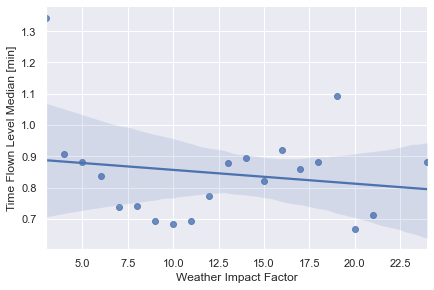

In [5]:
df = metrics_WIF_vertical_PIs_by_hour_df.copy()

df = df[df['timeOnLevelsMean']>0]

# remove time on levels outliers
p1 = df["timeOnLevelsMean"].quantile(0.05)
p2 = df["timeOnLevelsMean"].quantile(0.95)
df = df.loc[(df['timeOnLevelsMean'] > p1) & (df['timeOnLevelsMean'] < p2) ]
#p2 = df["timeOnLevelsMean"].quantile(0.95)
#df = df.loc[df['timeOnLevelsMean'] < p2]


df.set_index(['WIF'], inplace=True)
df.sort_index(inplace=True)

median_df = pd.DataFrame(columns=['WIF', 'timeOnLevelsMedian'])

for idx, group in df.groupby(level='WIF'):
    
    #if len(group)<3:
    #    continue
    
    idx_df = group['timeOnLevelsMean']

    idx_median = np.median(idx_df)
    median_df = median_df.append({'WIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

#print(median_df.tail())

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='WIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Weather Impact Factor')
plt.ylabel('Time Flown Level Median [min]')


#statsmodel:
X_df = median_df[['WIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary()) #ESGG: 0.71 (0.46), ESSA: 0.76 (0.74)

# Time On Levels (per flight)

## Medians of Time On Levels vs AIF (2019-2020)

                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     2.843
Date:                Tue, 21 Dec 2021   Prob (F-statistic):              0.112
Time:                        18:56:33   Log-Likelihood:                 8.9067
No. Observations:                  17   AIC:                            -13.81
Df Residuals:                      15   BIC:                            -12.15
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9540      0.091     10.490      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


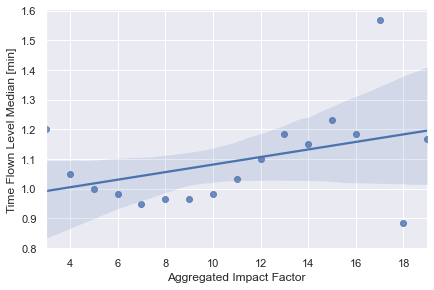

In [6]:
df = metrics_AIF_vertical_PIs_by_flight_df.copy()
df = df[df['timeOnLevels']>0]

# remove time on levels outliers
p1 = df["timeOnLevels"].quantile(0.05)
p2 = df["timeOnLevels"].quantile(0.95)
df = df.loc[(df['timeOnLevels'] > p1) & (df['timeOnLevels'] < p2) ]

median_df = pd.DataFrame(columns=['AIF', 'timeOnLevelsMedian'])

df.set_index(['AIF'], inplace=True)
df.sort_index(inplace=True)

for idx, group in df.groupby(level='AIF'):
    
    idx_df = df.loc[idx]['timeOnLevels']
    
    if idx_df.any():
        idx_median = np.median(idx_df)
        median_df = median_df.append({'AIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)
#print(median_df.head())

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='AIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Aggregated Impact Factor')
plt.ylabel('Time Flown Level Median [min]')


#statsmodel:
X_df = median_df[['AIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

## Medians of Time On Levels vs TIF (2019-2020)

                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     13.02
Date:                Tue, 21 Dec 2021   Prob (F-statistic):            0.00567
Time:                        18:56:34   Log-Likelihood:                 14.910
No. Observations:                  11   AIC:                            -25.82
Df Residuals:                       9   BIC:                            -25.02
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8685      0.039     22.323      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


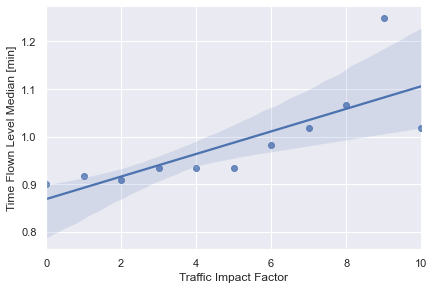

In [7]:
df = metrics_TIF_vertical_PIs_by_flight_df.copy()

df = df[df['timeOnLevels']>0]

# remove time on levels outliers
p1 = df["timeOnLevels"].quantile(0.05)
p2 = df["timeOnLevels"].quantile(0.95)
df = df.loc[(df['timeOnLevels'] > p1) & (df['timeOnLevels'] < p2) ]

median_df = pd.DataFrame(columns=['TIF', 'timeOnLevelsMedian'])

df.set_index(['TIF'], inplace=True)
df.sort_index(inplace=True)

for idx, group in df.groupby(level='TIF'):
    
    if len(group)<3:
        continue
    
    idx_df = df.loc[idx]['timeOnLevels']
    
    if idx == 2:
        sorted_idx_df = np.sort(idx_df)
        #print(list(sorted_idx_df))
    
    idx_median = np.median(idx_df)
    median_df = median_df.append({'TIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)
#print(median_df.head())

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='TIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Traffic Impact Factor')
plt.ylabel('Time Flown Level Median [min]')


#statsmodel:
X_df = median_df[['TIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())

## Medians of Time On Levels vs WIF (2019-2020)

                            OLS Regression Results                            
Dep. Variable:     timeOnLevelsMedian   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     3.483
Date:                Tue, 21 Dec 2021   Prob (F-statistic):             0.0793
Time:                        18:56:34   Log-Likelihood:                 5.1745
No. Observations:                  19   AIC:                            -6.349
Df Residuals:                      17   BIC:                            -4.460
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9353      0.108      8.690      0.0

C:\Users\anale19\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


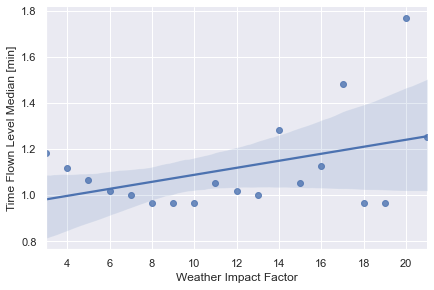

In [8]:
df = metrics_WIF_vertical_PIs_by_flight_df.copy()

df = df[df['timeOnLevels']>0]

# remove time on levels outliers
p1 = df["timeOnLevels"].quantile(0.05)
p2 = df["timeOnLevels"].quantile(0.95)
df = df.loc[(df['timeOnLevels'] > p1) & (df['timeOnLevels'] < p2) ]
#p2 = df["timeOnLevels"].quantile(0.95)
#df = df.loc[df['timeOnLevels'] < p2]

median_df = pd.DataFrame(columns=['WIF', 'timeOnLevelsMedian'])

df.set_index(['WIF'], inplace=True)
df.sort_index(inplace=True)

for idx, group in df.groupby(level='WIF'):
    
    if len(group)<3:
        continue
        
    idx_df = group.loc[idx]['timeOnLevels']
        
    idx_median = np.median(idx_df)
    median_df = median_df.append({'WIF': idx, 'timeOnLevelsMedian': idx_median}, ignore_index=True)

sns.set(rc={'figure.figsize':(1,1)})

sns.lmplot(x='WIF',y='timeOnLevelsMedian',data=median_df,fit_reg=True, height=4, aspect=3/2);
plt.xlabel('Weather Impact Factor')
plt.ylabel('Time Flown Level Median [min]')


#statsmodel:
X_df = median_df[['WIF']]
y_df = median_df[['timeOnLevelsMedian']]

X2 = sm.add_constant(X_df.values)
est = sm.OLS(y_df, X2)
est2 = est.fit()
print(est2.summary())